# Job Description Word Clouds
The following notebook scrapes job postings on linkedin and creates cloud visualizations of the most frequently occurring words

In [74]:
## Install priniciple dependencies
# importing packages
import pandas as pd
import re

from bs4 import BeautifulSoup
from datetime import date, timedelta, datetime
from IPython.core.display import clear_output
from random import randint
from requests import get
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from time import sleep
from time import time
start_time = time()

from warnings import warn

## Scraping Job Description

In [165]:
driver = webdriver.Chrome("/Users/stephenscherrer/Documents/Programming/Projects/Scraping Wannasurf.com/chromedriver")

In [166]:
# replace variables here.
url = "https://www.linkedin.com/jobs/search/?geoId=90000084&keywords=data%20scientist&location=San%20Francisco%20Bay%20Area"
no_of_jobs = 25

In [167]:
# this will open up new window with the url provided above 
driver.get(url)
sleep(3)
action = ActionChains(driver)

In [168]:
# to show more jobs. Depends on number of jobs selected
i = 2
while i <= (no_of_jobs/25): 
    driver.find_element_by_xpath('/html/body/main/div/section/button').click()
    i = i + 1
    sleep(5)

In [169]:
# parsing the visible webpage
pageSource = driver.page_source
lxml_soup = BeautifulSoup(pageSource, 'lxml')

# searching for all job containers
job_container = lxml_soup.find('ul', class_ = 'jobs-search__results-list')

print('You are scraping information about {} jobs.'.format(len(job_container)))

You are scraping information about 23 jobs.


In [170]:
# setting up list for job information
job_id = []
post_title = []
company_name = []
post_date = []
job_location = []
job_desc = []
level = []
emp_type = []
functions = []
industries = []

# for loop for job title, company, id, location and date posted
for job in job_container:
    
    # job title
    job_titles = job.find("span", class_="screen-reader-text").text
    post_title.append(job_titles)
    
    # linkedin job id
    job_ids = job.find('a', href=True)['href']
    job_ids = re.findall(r'(?!-)([0-9]*)(?=\?)',job_ids)[0]
    job_id.append(job_ids)
    
    # company name
    company_names = job.select_one('img')['alt']
    company_name.append(company_names)
    
    # job location
    job_locations = job.find("span", class_="job-result-card__location").text
    job_location.append(job_locations)
    
    # posting date
    post_dates = job.select_one('time')['datetime']
    post_date.append(post_dates)

# for loop for job description and criterias
print('loop2')
for x in range(1,len(job_id)+1):
    
    # clicking on different job containers to view information about the job
    job_xpath = '/html/body/main/div/section/ul/li[{}]/img'.format(x)
    driver.find_element_by_xpath(job_xpath).click()
    sleep(3)
    
    # job description
    try:
        jobdesc_xpath = '/html/body/main/section/div[2]/section[2]/div'
        job_descs = driver.find_element_by_xpath(jobdesc_xpath).text
        job_desc.append(job_descs)
    except:
        job_desc.append('No Description Provided')

    
    # job criteria container below the description
    try:
        job_criteria_container = lxml_soup.find('ul', class_ = 'job-criteria__list')
        all_job_criterias = job_criteria_container.find_all("span", class_='job-criteria__text job-criteria__text--criteria')
    except:
        all_job_criterias = 'No Criteria'
        
    # Seniority level
    try:
        seniority_xpath = '/html/body/main/section/div[2]/section[2]/ul/li[1]'
        seniority = driver.find_element_by_xpath(seniority_xpath).text.splitlines(0)[1]
        level.append(seniority)
    except:
        level.append('No Level Provided')
    
    
    # Employment type
    try:
        type_xpath = '/html/body/main/section/div[2]/section[2]/ul/li[2]'
        employment_type = driver.find_element_by_xpath(type_xpath).text.splitlines(0)[1]
        emp_type.append(employment_type)
    except:
        emp_type.append('No Employment Type Provided')
        
    # Job function
    try:
        function_xpath = '/html/body/main/section/div[2]/section[2]/ul/li[3]'
        job_function = driver.find_element_by_xpath(function_xpath).text.splitlines(0)[1]
        functions.append(job_function)
    except:
        functions.append('No Function Provided')
    
    # Industries
    try:
        industry_xpath = '/html/body/main/section/div[2]/section[2]/ul/li[4]'
        industry_type = driver.find_element_by_xpath(industry_xpath).text.splitlines(0)[1]
        industries.append(industry_type)
    except:
        industries.append('No Industry Information Provided')
    
    x = x+1

loop2


In [171]:
# to check if we have all information
print(len(job_id))
print(len(post_date))
print(len(company_name))
print(len(post_title))
print(len(job_location))
print(len(job_desc))
print(len(level))
print(len(emp_type))
print(len(functions))
print(len(industries))

23
23
23
23
23
23
23
23
23
23


In [172]:
# creating a dataframe
job_data = pd.DataFrame({'Job ID': job_id,
'Date': post_date,
'Company Name': company_name,
'Post': post_title,
'Location': job_location,
'Description': job_desc,
'Level': level,
'Type': emp_type,
'Function': functions,
'Industry': industries
})

# cleaning description column
job_data['Description'] = job_data['Description'].str.replace('\n',' ')

print(job_data.info())
job_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 10 columns):
Job ID          23 non-null object
Date            23 non-null object
Company Name    23 non-null object
Post            23 non-null object
Location        23 non-null object
Description     23 non-null object
Level           23 non-null object
Type            23 non-null object
Function        23 non-null object
Industry        23 non-null object
dtypes: object(10)
memory usage: 1.9+ KB
None


,Job ID,Date,Company Name,Post,Location,Description,Level,Type,Function,Industry
0,2247973048,2020-10-18,EA Team Inc,Data Scientist with Machine Learning (ML) - Su...,"Sunnyvale, CA",Data Scientist with Machine Learning (ML) Loc...,Entry level,Full-time,EngineeringInformation Technology,Information Technology and ServicesComputer So...
1,2248019033,2020-10-28,Facebook,"Research Scientist, Vision","Menlo Park, CA",Facebook's mission is to give people the power...,Mid-Senior level,Full-time,Information Technology,Internet
2,2215723874,2020-10-26,Intuit,Senior Data Scientist,"Mountain View, CA",Overview Intuit is looking for innovative and...,Mid-Senior level,Full-time,Other,Information Technology and ServicesComputer So...
3,2247758679,2020-10-28,Experis,Language Data Engineer,"San Mateo, CA",Language Data Engineer 9 month contract Palo A...,Mid-Senior level,Contract,Engineering,Consumer Electronics
4,2230877275,2020-10-20,SymphonyRM,Data Engineer,"Palo Alto, CA",Introduction SymphonyRM helps health systems ...,Not Applicable,Full-time,Information Technology,Computer SoftwareInternetHospital & Health Care


## Generating Word Clouds

Company:  EA Team Inc
Position:  Data Scientist with Machine Learning (ML) - Sunnyvale


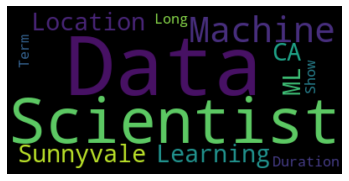

Company:  Facebook
Position:  Research Scientist, Vision


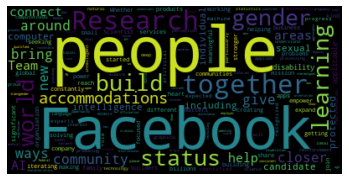

Company:  Intuit
Position:  Senior Data Scientist


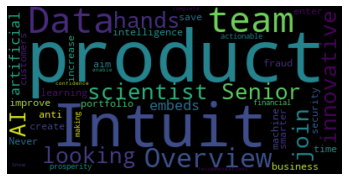

Company:  Experis
Position:  Language Data Engineer 


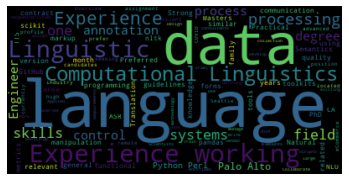

Company:  SymphonyRM
Position:  Data Engineer


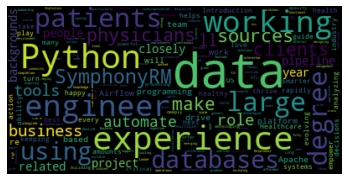

Company:  Intuit
Position:  Senior Data Scientist


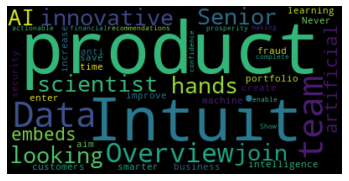

Company:  Tesla
Position:  Data Scientist


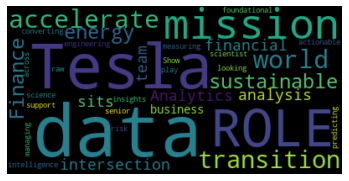

Company:  Guardant Health
Position:  Senior Bioinformatics Data Engineer


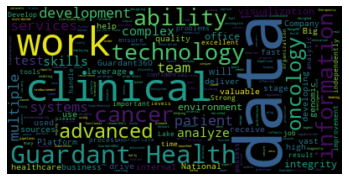

Company:  EA Team Inc
Position:  Data Scientist with Machine Learning (ML) -- immediate -- Moving Hot !!!


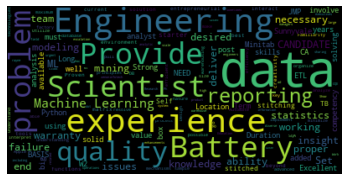

Company:  Intuit
Position:  Staff Data Scientist


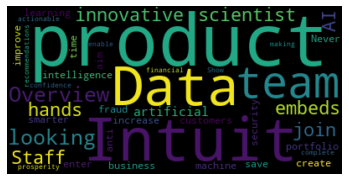

Company:  PayPal
Position:  Lead Data Scientist


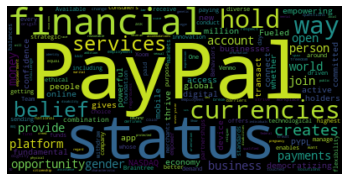

Company:  LinkedIn
Position:  Data Scientist Intern 


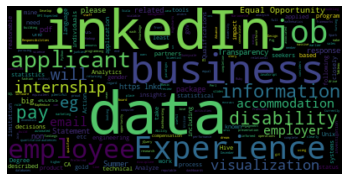

Company:  Kelly
Position:  Data Scientist


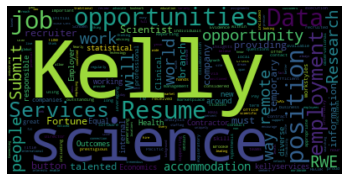

Company:  F5
Position:  Data Scientist - Analytics Product Group


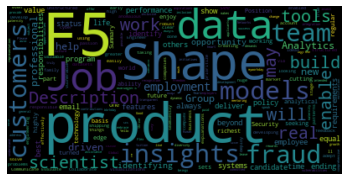

Company:  Earnin
Position:  Senior Data Scientist


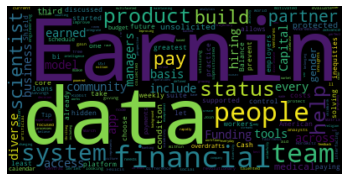

Company:  Tesla
Position:  Data Scientist, Business Analytics


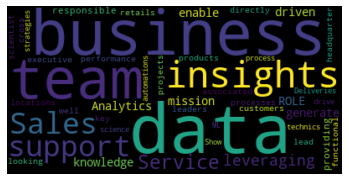

Company:  Systems Integration Solutions, Inc.
Position:  Data Scientist /Machine Learning Engineer


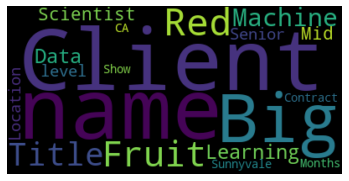

Company:  Livongo
Position:  Senior Data Scientist


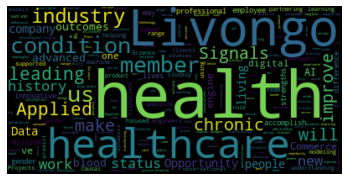

Company:  Intuit
Position:  Staff Data Scientist


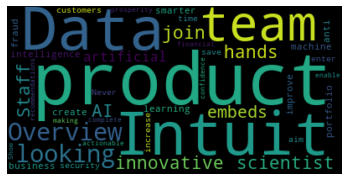

Company:  Facebook
Position:  Research Scientist, Artificial Intelligence (PhD)


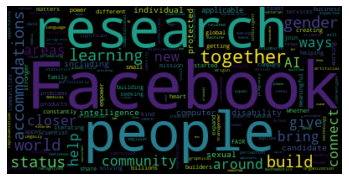

Company:  Dice
Position:  Data Scientist


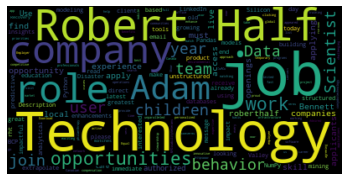

Company:  Wiley Job Network
Position:  Data Scientist, Auction and Delivery


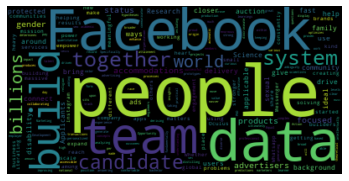

Company:  Facebook
Position:  Biometrics Research Scientist


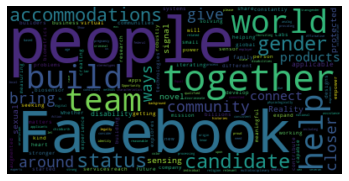

In [173]:
## Loop through each job description
for i, text in enumerate(job_data.Description):
    # Print Job Details
    print('Company: ', job_data['Company Name'][i])
    print('Position: ', job_data['Post'][i])

    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()